# <center> Recurrent Neural Networks - Long Short Term Memory</center>

# Recurrent Neural Networks (RNN)

As it was seen beforehand in previous courses, Neural Networks offer a very comprehensive and efficient solution to classification problems. However could it also be applied to other problems such as prediction and time series forecasting? 

Google Translate, Apple's Siri, ... What do these applications have in common? They rely on specific Neural Networks called Recurrent Neural Networks. The core difference with what we have been seen before is the ability of RNNs to "remember" informations from previous chunk of the network 

To illustrate this idea, a graphical representation is a sound choice

<img src="Pics/RNN-rolled.png" alt="RNN-rolled.PNG" style="width: 100px;"/>

This "rolled" representation of the RNN shows us an input $x_t$ in the network that then outputs an $h_t$. This is a classic scheme for Neural Networks. However there is a loop on the network that can be unrolled (see below) to represent the loop mechanism or a RNN

<img src="Pics/RNN-unrolled.png" alt="RNN-unrolled.png" style="width: 600px;"/>

We see here that the input is in reality made out of several inputs for each step $1$ to $t$. The network feeds itself with previous values it computed to improve the results it gets. The most simple form of RNN feeds itself its outputs as inputs for instance (see: https://keras.io/layers/recurrent/ - SimpleRNN)  

Now that the core idea of a RNN has been introduced, let's try to implement one using Keras:

<center>Let's predict an airline's sales for the upcoming year using an RNN network

To make this exercise , we will use the data and the example used in the following article <br> 
<center><b>Time Series Prediction with LSTM Recurrent Neural Networks in Python with Keras </b></center> <br>
https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/


Let's begin by plotting the previous sales in order to better our problem  

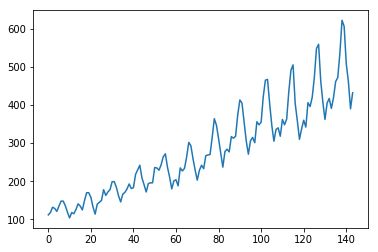

In [3]:
import math
import pandas
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


dataset = pandas.read_csv('data/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

A first insight on our data shows us that the sales seem to follow a cyclic pattern and as such a NN with the ability to "remember" what came before could be a good approah to this problem.  

### Let's prepare our data

In [15]:
# fix random seed for reproducibility
np.random.seed(7)

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

Let's introduce the create_dataset function that we will use in our example

In [16]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [17]:
# Using the create_dataset function given beforehand, reshape test and train into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN

# create and fit the LSTM network
model = Sequential()
model.add(SimpleRNN(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

Using TensorFlow backend.


Epoch 1/100
 - 2s - loss: 0.0028
Epoch 2/100
 - 0s - loss: 0.0023
Epoch 3/100
 - 0s - loss: 0.0023
Epoch 4/100
 - 0s - loss: 0.0022
Epoch 5/100
 - 0s - loss: 0.0021
Epoch 6/100
 - 0s - loss: 0.0022
Epoch 7/100
 - 0s - loss: 0.0021
Epoch 8/100
 - 0s - loss: 0.0021
Epoch 9/100
 - 0s - loss: 0.0022
Epoch 10/100
 - 0s - loss: 0.0021
Epoch 11/100
 - 0s - loss: 0.0020
Epoch 12/100
 - 0s - loss: 0.0020
Epoch 13/100
 - 0s - loss: 0.0020
Epoch 14/100
 - 0s - loss: 0.0020
Epoch 15/100
 - 0s - loss: 0.0020
Epoch 16/100
 - 0s - loss: 0.0020
Epoch 17/100
 - 0s - loss: 0.0020
Epoch 18/100
 - 0s - loss: 0.0021
Epoch 19/100
 - 0s - loss: 0.0020
Epoch 20/100
 - 0s - loss: 0.0021
Epoch 21/100
 - 0s - loss: 0.0020
Epoch 22/100
 - 0s - loss: 0.0020
Epoch 23/100
 - 0s - loss: 0.0019
Epoch 24/100
 - 0s - loss: 0.0020
Epoch 25/100
 - 0s - loss: 0.0019
Epoch 26/100
 - 0s - loss: 0.0020
Epoch 27/100
 - 0s - loss: 0.0020
Epoch 28/100
 - 0s - loss: 0.0019
Epoch 29/100
 - 0s - loss: 0.0020
Epoch 30/100
 - 0s - lo

Train Score: 21.63 RMSE
Test Score: 51.65 RMSE


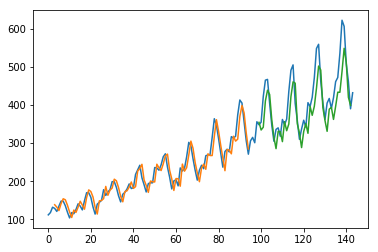

In [12]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## Limits of RNNs: The vanishing gradient problem

However as we try to imporve our model, we will encounter one of the main issues of 

# Long Short Term Memory

In order to compose with RNNs short-comings, a new method was designed to counter the vanishing gradient issue. These networks are called LSTM 

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

Epoch 1/100
 - 3s - loss: 0.0542
Epoch 2/100
 - 1s - loss: 0.0259
Epoch 3/100
 - 1s - loss: 0.0167
Epoch 4/100
 - 1s - loss: 0.0145
Epoch 5/100
 - 1s - loss: 0.0129
Epoch 6/100
 - 1s - loss: 0.0116
Epoch 7/100
 - 1s - loss: 0.0105
Epoch 8/100
 - 1s - loss: 0.0094
Epoch 9/100
 - 1s - loss: 0.0081
Epoch 10/100
 - 1s - loss: 0.0074
Epoch 11/100
 - 1s - loss: 0.0066
Epoch 12/100
 - 1s - loss: 0.0060
Epoch 13/100
 - 1s - loss: 0.0056
Epoch 14/100
 - 1s - loss: 0.0052
Epoch 15/100
 - 1s - loss: 0.0050
Epoch 16/100
 - 1s - loss: 0.0049
Epoch 17/100
 - 1s - loss: 0.0046
Epoch 18/100
 - 1s - loss: 0.0045
Epoch 19/100
 - 1s - loss: 0.0045
Epoch 20/100
 - 1s - loss: 0.0043
Epoch 21/100
 - 1s - loss: 0.0043
Epoch 22/100
 - 1s - loss: 0.0042
Epoch 23/100
 - 1s - loss: 0.0042
Epoch 24/100
 - 1s - loss: 0.0042
Epoch 25/100
 - 1s - loss: 0.0040
Epoch 26/100
 - 1s - loss: 0.0041
Epoch 27/100
 - 1s - loss: 0.0040
Epoch 28/100
 - 1s - loss: 0.0040
Epoch 29/100
 - 1s - loss: 0.0039
Epoch 30/100
 - 1s - lo

Train Score: 0.05 RMSE
Test Score: 0.11 RMSE


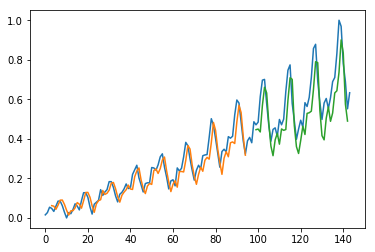

In [19]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()